# Analysis on Fandango Movie Ratings

Data journalist Walt Hickey published an article claiming Fandango website had inflated movie ratings. Fandango claimed it was an internal error for the system, and has already fixed the issue. 

Now we examine whether Fandango still inflates its movie rating by rounding up the actual ratings, and whether there is any change to Fandango's rating system after the Hickey analysis. 

# Understanding the data

In [1]:
import pandas as pd
score_comp = pd.read_csv('fandango_score_comparison.csv')
rating_1617 = pd.read_csv('movie_ratings_16_17.csv')

In [2]:
# check the data structure for rating data before Hickey's analysis
score_comp.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


In [3]:
rating_1617.head()

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.50,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.50,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.00,2.35,2.5,3.5,2.0,2.5
3,A Dog's Purpose,2017,43,5.2,33,76,4.5,2.15,2.60,1.65,3.80,2.0,2.5,1.5,4.0
4,A Hologram for the King,2016,58,6.1,70,57,3.0,2.90,3.05,3.50,2.85,3.0,3.0,3.5,3.0


In [4]:
# Choose the columns relevant to the analysis
score_comp_relevant = score_comp[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference']]
score_comp_relevant.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5
3,Do You Believe? (2015),5.0,4.5,1793,0.5
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5


In [5]:
# choose the relevant columns from dataframe for rating data after Hickey's analysis
rating_1617_relevant = rating_1617[['movie', 'year', 'fandango']]
rating_1617_relevant.head()

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
3,A Dog's Purpose,2017,4.5
4,A Hologram for the King,2016,3.0


In [6]:
# Goal: to examine whether Fandango rating system has changed, we need to see whether there is any change in rating distribution pattern before and after the Hickey analysis. 
# Also, see if there is any change in the difference between user score and Fandango rating prior to and after Hickey analysis
# According to README file from the data sources, movies with more than 30 review votes will be included in the sample, which leads to the samples not being representative of the entire population. 
# We need to change the goal of the analysis to examine the rating system change for "popular movies"

# Isolating samples

In [7]:
list(score_comp)

['FILM',
 'RottenTomatoes',
 'RottenTomatoes_User',
 'Metacritic',
 'Metacritic_User',
 'IMDB',
 'Fandango_Stars',
 'Fandango_Ratingvalue',
 'RT_norm',
 'RT_user_norm',
 'Metacritic_norm',
 'Metacritic_user_nom',
 'IMDB_norm',
 'RT_norm_round',
 'RT_user_norm_round',
 'Metacritic_norm_round',
 'Metacritic_user_norm_round',
 'IMDB_norm_round',
 'Metacritic_user_vote_count',
 'IMDB_user_vote_count',
 'Fandango_votes',
 'Fandango_Difference']

In [8]:
# Sample prior to Hickey analysis include no movies with less than 30 fan votes on Fandango
unpopular = score_comp[score_comp['Fandango_votes'] < 30]['Fandango_votes'].sum()
unpopular

0

In [9]:
# Randomly check 10 samples from data after Hickey analysis to see if those have popular ratings  

In [10]:
rating_1617_sample = rating_1617_relevant.sample(10, random_state = 1)
rating_1617_sample

,movie,year,fandango
108,Mechanic: Resurrection,2016,4.0
206,Warcraft,2016,4.0
106,Max Steel,2016,3.5
107,Me Before You,2016,4.5
51,Fantastic Beasts and Where to Find Them,2016,4.5
33,Cell,2016,3.0
59,Genius,2016,3.5
152,Sully,2016,4.5
4,A Hologram for the King,2016,3.0
31,Captain America: Civil War,2016,4.5


In [11]:
# Collect Fan rating data as of April 2019 from web and save them in a separate column into the random sample from the rating_1617 dataframe
Recent_fan_rating = [2251, 7284, 495, 5274, 13502, 18, 1, 11890, 501, 35177]
rating_1617_sample['act_fan_rating'] = Recent_fan_rating
rating_1617_sample

,movie,year,fandango,act_fan_rating
108,Mechanic: Resurrection,2016,4.0,2251
206,Warcraft,2016,4.0,7284
106,Max Steel,2016,3.5,495
107,Me Before You,2016,4.5,5274
51,Fantastic Beasts and Where to Find Them,2016,4.5,13502
33,Cell,2016,3.0,18
59,Genius,2016,3.5,1
152,Sully,2016,4.5,11890
4,A Hologram for the King,2016,3.0,501
31,Captain America: Civil War,2016,4.5,35177


In [12]:
# From above, we can see 8 out of 10 random samples are popular with more than 30 fan ratings, while only Cell and Genius had less than 30 fan ratings.
# This should be good enough to represent the popular movies. 

In [13]:
# We now want to filter out movies released in 2015 and 2016, out of all the movies:
score_comp_relevant['Year'] = score_comp_relevant['FILM'].str[-5:-1]
score_comp_relevant.head()

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,Year
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5,2015
1,Cinderella (2015),5.0,4.5,12640,0.5,2015
2,Ant-Man (2015),5.0,4.5,12055,0.5,2015
3,Do You Believe? (2015),5.0,4.5,1793,0.5,2015
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5,2015


In [14]:
# make a separate dataframe just for movies released in 2015
score_comp_relevant_2015 = score_comp_relevant[score_comp_relevant['Year'] == '2015']
score_comp_relevant_2015.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,Year
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5,2015
1,Cinderella (2015),5.0,4.5,12640,0.5,2015
2,Ant-Man (2015),5.0,4.5,12055,0.5,2015
3,Do You Believe? (2015),5.0,4.5,1793,0.5,2015
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5,2015


In [15]:
# make a separate dataframe just for movies released in 2016
score_comp_relevant_2016 = score_comp_relevant[score_comp_relevant['Year'] == '2016']
score_comp_relevant_2016.head()
# Looks like there is no movies released in 2016 in the analysis prior to Hickey analysis

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,Year


In [16]:
# check the frequency distribution by Year the movies are released
score_comp_relevant['Year'].value_counts()
# The result confirmed that there is no 2016 movie in this data set

2015    129
2014     17
Name: Year, dtype: int64

In [17]:
# check the data after Hickey analysis (rating_1617)
rating_1617['year'].value_counts()

2016    191
2017     23
Name: year, dtype: int64

In [18]:
# isolate only movies released in 2016
rating_16 = rating_1617_relevant[rating_1617_relevant['year'] == 2016]
rating_16.head()

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
4,A Hologram for the King,2016,3.0
5,A Monster Calls,2016,4.0


# Compare distribution shapes for 2015 and 2016

If we find any difference between 2015 and 2016 rating distribution, it would mean that Fandango's rating system has in fact changed, otherwise it would indicate the rating system remains the same. 

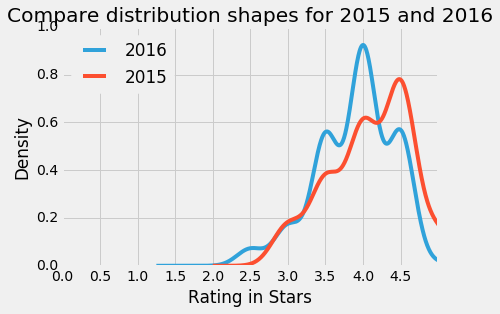

In [19]:
import matplotlib.pyplot as plt
from numpy import arange
%matplotlib inline
plt.style.use('fivethirtyeight')
rating_16['fandango'].plot.kde(label = '2016', legend = True)
score_comp_relevant_2015['Fandango_Stars'].plot.kde(label = '2015', legend = True)
plt.title('Compare distribution shapes for 2015 and 2016')
plt.xlim(0,5)
plt.xticks(arange(0,5,0.5))
plt.xlabel('Rating in Stars')

Both distributions are left-skewed distribution, meaning both 2015 and 2016 rating systems are skewed towards higher ratings in 4.0 and 4.5 stars. 

That being said, it looks like the 2016 rating distribution is less biased than the 2015 rating distribution after the Hickey publication. The most frequent ratings are 4 star in 2016 data, compared to 4.5 star in 2015 data. 

Therefore we can conclude that there is indeed a change in Fandango's rating systems between 2015 and 2016 movies. 2016 movies are generally lowered rated compared to 2015 movies. 

# Compare relative frequencies

In [20]:
# Firstly examine again the two data sets
rating_16.describe()

,year,fandango
count,191.0,191.000000
mean,2016.0,3.887435
std,0.0,0.509540
min,2016.0,2.500000
25%,2016.0,3.500000
50%,2016.0,4.000000
75%,2016.0,4.250000
max,2016.0,5.000000


In [21]:
score_comp_relevant_2015.describe()

,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
count,129.000000,129.000000,129.000000,129.000000
mean,4.085271,3.846512,3761.891473,0.238760
std,0.538096,0.505446,6543.601748,0.152741
min,3.000000,2.700000,35.000000,0.000000
25%,3.500000,3.500000,210.000000,0.100000
50%,4.000000,3.900000,1415.000000,0.200000
75%,4.500000,4.200000,4045.000000,0.400000
max,5.000000,4.800000,34846.000000,0.500000


From above two tables of distributions, we can see the two data sets have significantly different number of movies: there are 129 movies in 2015 data set, and 191 movies in 2016 data set. This made comparing absolute frequencies less helpful in our analysis, therefore we need to compare relative frequencies. 

In [23]:
# Show relative frequency distribution of 2015 data
score_comp_relevant_2015['Fandango_Stars'].value_counts(normalize = True).sort_index()

3.0    0.085271
3.5    0.178295
4.0    0.286822
4.5    0.379845
5.0    0.069767
Name: Fandango_Stars, dtype: float64

In [25]:
# Show relative frequency distribution of 2016 data
rating_16['fandango'].value_counts(normalize = True).sort_index()

2.5    0.031414
3.0    0.073298
3.5    0.240838
4.0    0.403141
4.5    0.246073
5.0    0.005236
Name: fandango, dtype: float64

Comparing relative frequency distributions, we can see that 29% of 2015 movies are rated with 4 stars, compared to 40% in 2016 movies. However, 28% of 2015 movies are rated 4.5 stars, more than 25% in 2016 movies. 7% of 2015 movies are rated 5 stars, comapred to only 0.5% in 2016 movies. 

# Determine the direction of the change

In [37]:
# First need to compare the mean, median, and mode for each distribution
mean_2016 = rating_16['fandango'].mean()
median_2016 = rating_16['fandango'].median()
mode_2016 = rating_16['fandango'].mode()[0]
print(mean_2016, median_2016, mode_2016)

3.887434554973822 4.0 4.0


In [38]:
mean_2015 = score_comp_relevant_2015['Fandango_Stars'].mean()
median_2015 = score_comp_relevant_2015['Fandango_Stars'].median()
mode_2015 = score_comp_relevant_2015['Fandango_Stars'].mode()[0]
print(mean_2015, median_2015, mode_2015)

4.0852713178294575 4.0 4.5


In [39]:
# Make a table for the summary statistics 
import numpy as np
stats = pd.DataFrame()
stats['2015'] = [mean_2015, median_2015, mode_2015]
stats['2016'] = [mean_2016, median_2016, mode_2016] 
stats.index = ['mean', 'median', 'mode']
stats


,2015,2016
mean,4.085271,3.887435
median,4.000000,4.000000
mode,4.500000,4.000000


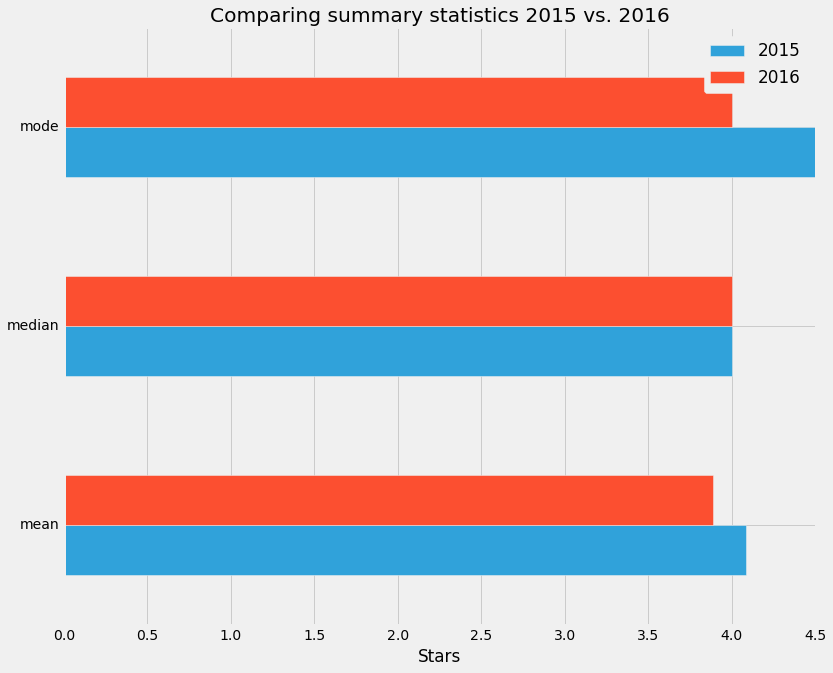

In [44]:
# Draw a chart showing the difference between 2015 and 2016 statistics
stats.plot.barh(figsize = (12,10), title = 'Comparing summary statistics 2015 vs. 2016')
plt.xlabel('Stars')

From above analysis, we can conclude that there is indeed some difference between rating systems before and after the Hickey analysis. Generally popular movies in 2015 received higher ratings than popular movies in 2016. 